参数估计，估计对应p,q下的集体层P,Q,M，然后保存至coeff_cont

In [1]:
%matplotlib inline
import pylab as pl
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import pandas as pd
import pickle
pl.rcParams.update({'font.size': 15, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

### 1. Topology--degree distribution and "small world" effect

In [2]:
u = "/home/yu/PycharmProjects/A-fast-method/auto_data/"

In [3]:
f = open(u + 'bound.pkl', 'rb')
bound_dict = pickle.load(f)

In [5]:
for key in sorted(bound_dict.keys()):
    print(key)
    print('p: %.5f~%.5f' % bound_dict[key][0][0],end=' ')
    print('q: %.5f~%.5f' % bound_dict[key][0][1])
    print('P: %.5f~%.5f' % bound_dict[key][1][0],end=' ')
    print('Q: %.5f~%.5f' % bound_dict[key][1][1])
    print('*******************************************')

barabasi_albert_graph(10000,3)
p: 0.00007~0.02100 q: 0.03600~0.08000
P: 0.00057~0.03664 Q: 0.23386~0.60553
*******************************************
exponential_graph(10000,3)
p: 0.00007~0.02193 q: 0.04400~0.08000
P: 0.00024~0.03029 Q: 0.29448~0.62143
*******************************************
gaussian_graph(10000,3)
p: 0.00038~0.02348 q: 0.06000~0.09600
P: 0.00061~0.03086 Q: 0.34446~0.56575
*******************************************
gnm_random_graph(10000,100000)
p: 0.00038~0.02586 q: 0.01800~0.03300
P: 0.00045~0.03034 Q: 0.32577~0.59065
*******************************************
gnm_random_graph(10000,30000)
p: 0.00038~0.02462 q: 0.07000~0.11000
P: 0.00064~0.03086 Q: 0.33857~0.56676
*******************************************
gnm_random_graph(10000,40000)
p: 0.00038~0.02493 q: 0.05250~0.08250
P: 0.00059~0.03073 Q: 0.35938~0.57295
*******************************************
gnm_random_graph(10000,50000)
p: 0.00038~0.02524 q: 0.04200~0.06600
P: 0.00064~0.03021 Q: 0.36093~0.57964
*

In [4]:
coeff_cont_gnm = np.load(u +"estimate_gnm_random_graph(10000,30000).npy")
coeff_cont_ba =  np.load(u +"estimate_barabasi_albert_graph(10000,3).npy")
coeff_cont_exp = np.load(u +"estimate_exponential_graph(10000,3).npy")
coeff_cont_gua = np.load(u +"estimate_gaussian_graph(10000,3).npy")
coeff_cont_log = np.load(u +"estimate_lognormal_graph(10000,3).npy")
coeff_cont_ws0 =  np.load(u +"estimate_watts_strogatz_graph(10000,6,0).npy")
coeff_cont_ws01 = np.load(u +"estimate_watts_strogatz_graph(10000,6,0.1).npy")
coeff_cont_ws03 = np.load(u +"estimate_watts_strogatz_graph(10000,6,0.3).npy")
coeff_cont_ws05 = np.load(u +"estimate_watts_strogatz_graph(10000,6,0.5).npy")
coeff_cont_ws07 = np.load(u +"estimate_watts_strogatz_graph(10000,6,0.7).npy")
coeff_cont_ws09 = np.load(u +"estimate_watts_strogatz_graph(10000,6,0.9).npy")
coeff_cont_ws10 = np.load(u +"estimate_watts_strogatz_graph(10000,6,1.0).npy")

In [5]:
d_cont = [coeff_cont_log,coeff_cont_ba,coeff_cont_exp,coeff_cont_gua,
          coeff_cont_gnm,coeff_cont_ws0,coeff_cont_ws01,coeff_cont_ws03,
          coeff_cont_ws05,coeff_cont_ws07,coeff_cont_ws09,coeff_cont_ws10]

title_cont = ['LOG','BA','EXP','GAU','ER','WS-0','WS-0.1','WS-0.3','WS-0.5','WS-0.7','WS-0.9','WS-1']

In [7]:
mean_r2 = [np.mean(x[:, 5]) for x in d_cont]
std_r2 = [np.std(x[:, 5]) for x in d_cont]

for i, x in enumerate(zip(mean_r2, std_r2)):
    print(title_cont[i], '\t' ,'%6.4f, %.4f' % tuple(x))

LOG 	 0.9959, 0.0042
BA 	 0.9920, 0.0037
EXP 	 0.9988, 0.0016
GAU 	 0.9993, 0.0004
ER 	 0.9992, 0.0005
WS-0 	 0.9746, 0.0149
WS-0.1 	 0.9947, 0.0025
WS-0.3 	 0.9975, 0.0026
WS-0.5 	 0.9987, 0.0007
WS-0.7 	 0.9988, 0.0007
WS-0.9 	 0.9989, 0.0007
WS-1 	 0.9988, 0.0007


In [21]:
for i, x in enumerate(zip(mean_r2, std_r2)):
    print title_cont[i], '\t' ,'%6.4f, %.4f' % tuple(x)

LOG 	0.9958, 0.0042
BA 	0.9920, 0.0037
EXP 	0.9988, 0.0016
GAU 	0.9993, 0.0004
ER 	0.9992, 0.0005
WS-0 	0.9775, 0.0142
WS-0.1 	0.9952, 0.0025
WS-0.3 	0.9981, 0.0012
WS-0.5 	0.9987, 0.0007
WS-0.7 	0.9988, 0.0007
WS-0.9 	0.9989, 0.0007
WS-1 	0.9988, 0.0007


(1) Estimated potential market

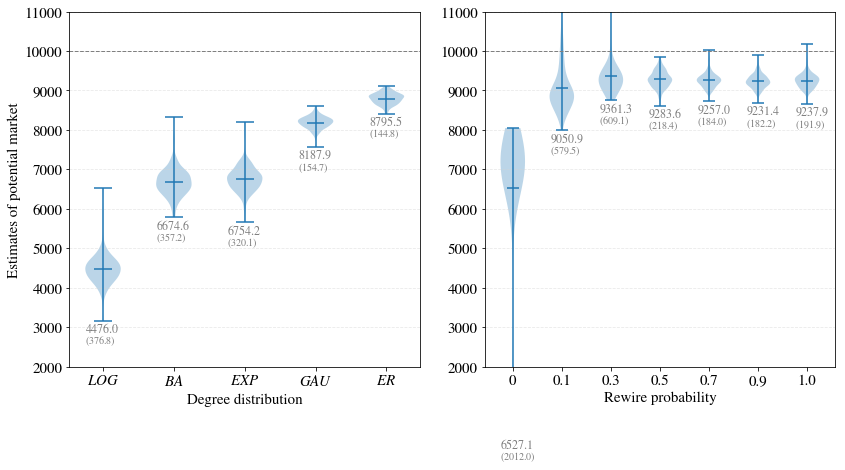

In [8]:
title_cont1 = ['LOG','BA','EXP','GAU','ER']
title_cont2 = ['WS-0','WS-0.1','WS-0.3','WS-0.5','WS-0.7','WS-0.9','WS-1']

d_cont1 = [coeff_cont_log,coeff_cont_ba,coeff_cont_exp,coeff_cont_gua,coeff_cont_gnm]
d_cont2 = [coeff_cont_ws0,coeff_cont_ws01,coeff_cont_ws03,coeff_cont_ws05,coeff_cont_ws07,coeff_cont_ws09,coeff_cont_ws10]

fig = pl.figure(figsize = (12,6))

ax1 = fig.add_subplot(1,2,1)
ax1.axhline(10000,color='gray',ls = '--', lw = 1)
ax1.set_ylim([2000,11000])
ax1.set_ylabel('Estimates of potential market',fontsize = 15)
ax1.set_xlabel('Degree distribution',fontsize = 15)
ax1.yaxis.grid(True, linestyle='--', which='major', color='lightgrey',alpha=0.5)

data1 = [v[:, 4] for v in d_cont1]
ax1.violinplot(data1,showmedians=False,showmeans=True,showextrema=True,widths = 0.5,positions=np.arange(1,6))
#ax1.boxplot(data1,notch=1,vert =1,whis=0,widths = 0.3,positions = np.arange(1,6))
for i in np.arange(1,6):
    ax1.text(i-0.25,np.min(data1[i-1])-200,r'$%.1f$'%np.mean(data1[i-1]),
             fontsize=12, verticalalignment='center',color='k',alpha=0.5)
    ax1.text(i-0.25,np.min(data1[i-1])-500,r'$(%.1f$)'%np.std(data1[i-1]),
             fontsize=10, verticalalignment='center',color='k',alpha=0.5)

ax2 = fig.add_subplot(1,2,2)
ax2.axhline(10000,color='gray',ls = '--', lw = 1)
ax2.set_ylim([2000,11000])
ax2.set_xlabel('Rewire probability',fontsize = 15)
data2 = [v[:, 4] for v in d_cont2]

ax2.yaxis.grid(True, linestyle='--', which='major', color='lightgrey',alpha=0.5)
ax2.violinplot(data2, showmedians=False, showmeans=True, showextrema=True, widths = 0.5, positions=np.arange(1,8))
#ax2.boxplot(data2,notch=1,vert =1,whis=0,widths = 0.3,positions = np.arange(1,8))
for i in np.arange(1,8):
    ax2.text(i - 0.25, np.min(data2[i - 1]) - 200, r'$%.1f$'%np.mean(data2[i - 1]),
             fontsize=12, verticalalignment='center',color='k',alpha=0.5)
    ax2.text(i - 0.25,np.min(data2[i - 1]) - 500, r'$(%.1f)$'%np.std(data2[i-1]),
             fontsize=10, verticalalignment='center', color='k', alpha=0.5)

pl.setp(ax1,xticks=[1,2,3,4,5],xticklabels=[r'$LOG$',r'$BA$',r'$EXP$',r'$GAU$',r'$ER$'])
pl.setp(ax2,xticks=[1,2,3,4,5,6,7],xticklabels=['0', '0.1','0.3','0.5','0.7','0.9','1.0'])
pl.tight_layout()
pl.show()

#### (2) Relationship between p and P

In [22]:
for i, title in enumerate(title_cont):
    X_data = d_cont[i][:, 2]
    Y_data = d_cont[i][:, 0]
    to_fit = pd.DataFrame({'X':X_data,'Y':Y_data})
    results = smf.ols('Y ~ X-1', data=to_fit).fit()
    a = results.params['X']
    r2 = results.rsquared
    print('%s, R2: %.4f, beta: %.2f' %(title, r2, a))

LOG, R2: 0.9952, beta: 0.56
BA, R2: 0.9908, beta: 0.61
EXP, R2: 0.9989, beta: 0.73
GAU, R2: 0.9985, beta: 0.80
ER, R2: 0.9986, beta: 0.81
WS-0, R2: 0.9624, beta: 0.43
WS-0.1, R2: 0.9919, beta: 0.61
WS-0.3, R2: 0.9969, beta: 0.73
WS-0.5, R2: 0.9964, beta: 0.77
WS-0.7, R2: 0.9966, beta: 0.78
WS-0.9, R2: 0.9966, beta: 0.79
WS-1, R2: 0.9970, beta: 0.79


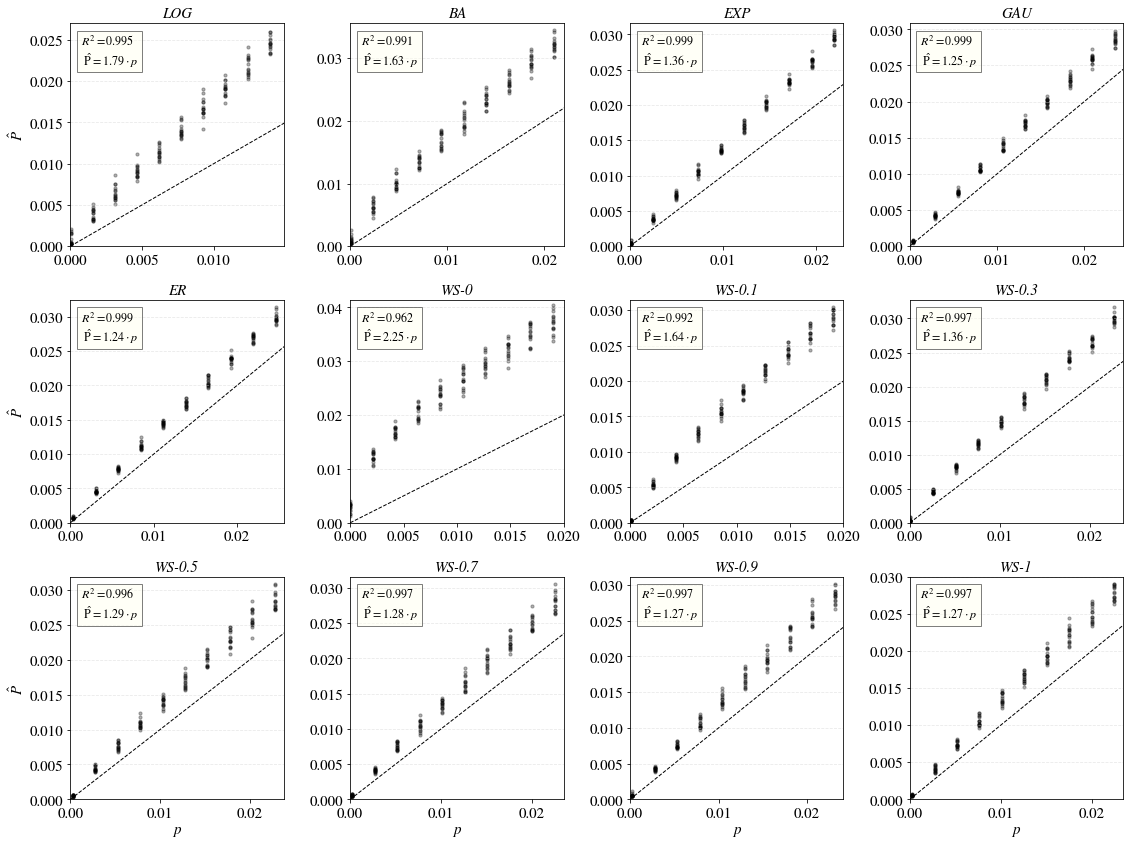

In [9]:
fig = pl.figure(figsize = (16,12))

for i in range(12):
    ax = fig.add_subplot(3,4,i+1)
    X_data = d_cont[i][:,  0]
    Y_data = d_cont[i][:, 2]
    to_fit = pd.DataFrame({'X':X_data,'Y':Y_data})
    results = smf.ols('Y ~ X-1', data=to_fit).fit()
    a = results.params['X']
    r2 = results.rsquared
    
    ax.scatter(X_data,Y_data,c='k',s=10,marker='o',alpha=0.3)   
    ax.plot(np.arange(0,np.max(X_data)+0.005,0.001),np.arange(0,np.max(X_data)+0.005,0.001),'k--',lw = 1)
    textstr = '$R^2 = %.3f$ \n $\mathrm{\hat P} = %.2f\cdot p$'%(r2,a)
    props = dict(facecolor = 'ivory',alpha=0.5)
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=props)
    
    ax.set_title('%s'%title_cont[i],fontsize=15,style='italic')
    ax.set_xlim([0,np.max(X_data)+0.001])
    ax.set_ylim([0,np.max(Y_data)+0.001])

    if i == 0 or i == 4 or i == 8:
        ax.set_ylabel(r'$\hat P$',fontsize=15)
    if i >= 8:
        ax.set_xlabel(r'$p$',fontsize=15)
    '''
    if i in [1,2,3,5,6,7,9,10,11]:
        ax.set_yticklabels([])
    if i < 8:
        ax.set_xticklabels([])'''
    ax.yaxis.grid(True, linestyle='--', which='major', color='lightgrey',alpha=0.5)
        
pl.tight_layout()

#### (2) Q and q

In [23]:
for i, title in enumerate(title_cont):
    X_data = d_cont[i][:, 1]
    Y_data = d_cont[i][:, 3]
    to_fit = pd.DataFrame({'X':X_data,'Y':Y_data})
    results = smf.ols('Y ~ X-1', data=to_fit).fit()
    a = results.params['X']
    r2 = results.rsquared
    print('%s, R2: %.4f, beta: %.2f' %(title, r2, a))

LOG, R2: 0.9883, beta: 12.83
BA, R2: 0.9916, beta: 7.84
EXP, R2: 0.9958, beta: 7.71
GAU, R2: 0.9996, beta: 5.85
ER, R2: 0.9991, beta: 5.07
WS-0, R2: 0.8970, beta: 2.48
WS-0.1, R2: 0.9769, beta: 3.22
WS-0.3, R2: 0.9917, beta: 3.99
WS-0.5, R2: 0.9975, beta: 4.35
WS-0.7, R2: 0.9984, beta: 4.50
WS-0.9, R2: 0.9984, beta: 4.54
WS-1, R2: 0.9985, beta: 4.55


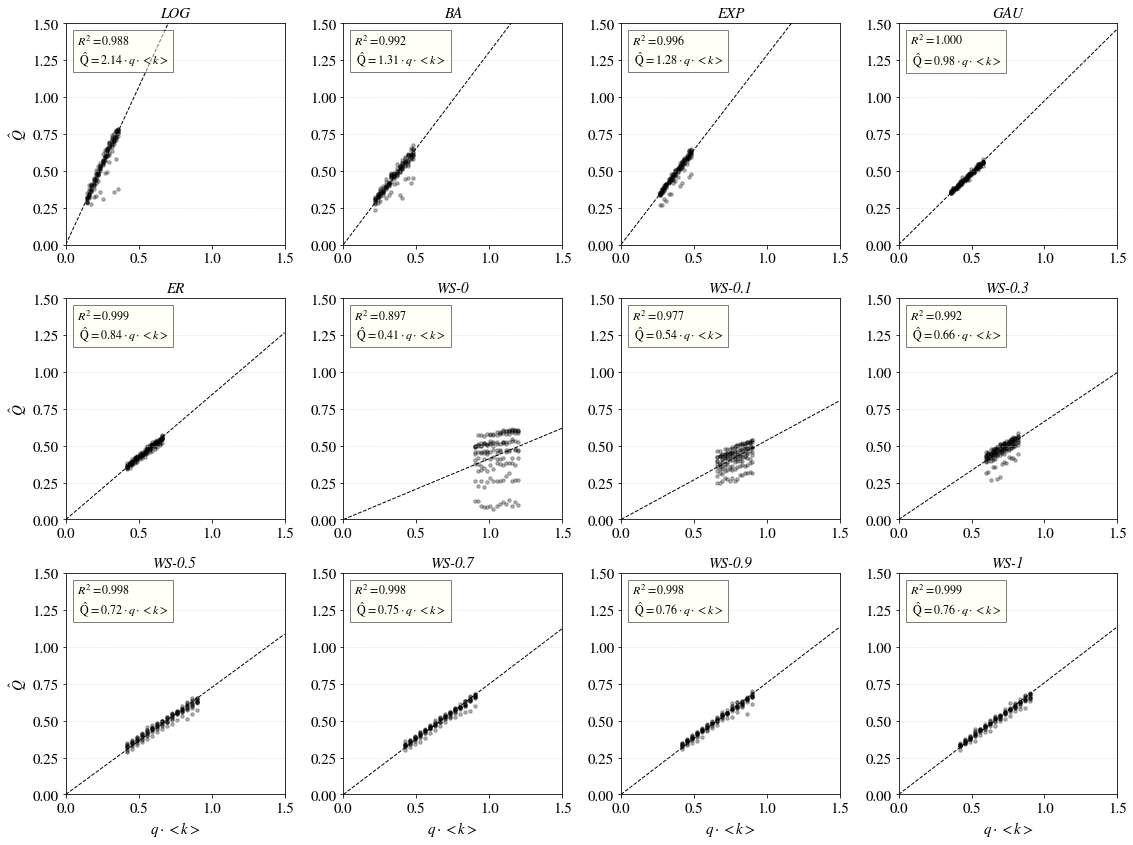

In [12]:
fig = pl.figure(figsize=(16,12))

for j in range(12):
    ax = fig.add_subplot(3,4,j+1)
    X_data = d_cont[j][:, 1] * 6
    Y_data = d_cont[j][:, 3]
    to_fit = pd.DataFrame({'X':X_data,'Y':Y_data})
    results = smf.ols('Y ~ X-1', data=to_fit).fit()
    a = results.params['X']
    r2 = results.rsquared
    
    textstr = '$R^2 = %.3f$ \n $\mathrm{\hat Q} = %.2f\cdot q\cdot<k>$'%(r2,a)
    props = dict(facecolor = 'ivory',alpha=0.5)
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=props)
    ax.set_xlim([0,1.5])#ax.set_xlim([np.min(X_data),np.max(X_data)])
    ax.set_ylim([0,1.5])
    ax.scatter(X_data,Y_data,c = 'k',marker='o',s=12,alpha=0.3)
    ax.plot([0,1.5],[0,1.5*a],'k--',lw = 1)
    ax.set_title(title_cont[j],fontsize = 15,style='italic')
    if j >= 8: 
        ax.set_xlabel('$q \cdot <k>$',fontsize=15)
    if j == 0 or j == 4 or j == 8:
        ax.set_ylabel('$\hatQ$',fontsize=15)
    
    ax.yaxis.grid(True, linestyle='--', which='major', color='lightgrey',alpha=0.5)
        
    '''
    if j < 8:
        ax.set_xticklabels([])
        
    if j in [1,2,3,5,6,7,9,10,11]:
        ax.set_yticklabels([])
    '''
pl.tight_layout()


### 2. Edge density

In [13]:
coeff_cont_gnm_3 = np.load(u +"estimate_gnm_random_graph(10000,30000).npy")
coeff_cont_gnm_4 = np.load(u +"estimate_gnm_random_graph(10000,40000).npy")
coeff_cont_gnm_5 = np.load(u +"estimate_gnm_random_graph(10000,50000).npy")
coeff_cont_gnm_6 = np.load(u +"estimate_gnm_random_graph(10000,60000).npy")
coeff_cont_gnm_7 = np.load(u +"estimate_gnm_random_graph(10000,70000).npy")
coeff_cont_gnm_8 = np.load(u +"estimate_gnm_random_graph(10000,80000).npy")
coeff_cont_gnm_9 = np.load(u +"estimate_gnm_random_graph(10000,90000).npy")
coeff_cont_gnm_10 = np.load(u +"estimate_gnm_random_graph(10000,100000).npy")

In [14]:
d_cont2 = [coeff_cont_gnm_3,coeff_cont_gnm_4,coeff_cont_gnm_5,coeff_cont_gnm_6,
           coeff_cont_gnm_7,coeff_cont_gnm_8,coeff_cont_gnm_9,coeff_cont_gnm_10]
title_cont

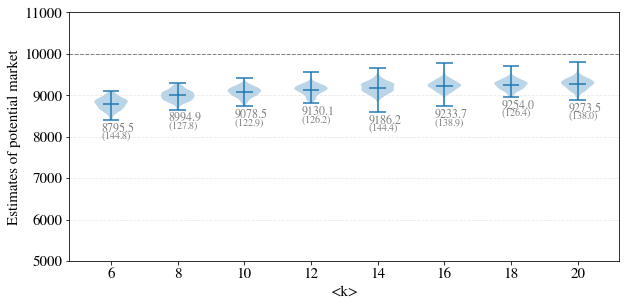

In [15]:
fig = pl.figure(figsize = (9,4.5))

ax = fig.add_subplot(1,1,1)
ax.axhline(10000,color='gray',ls = '--', lw = 1)
ax.set_ylim([5000,11000])
ax.set_xlabel('<k>')
ax.set_ylabel('Estimates of potential market',fontsize = 15)
data = [v[:, 4] for v in d_cont2]

#ax.boxplot(data,notch=1,vert =1,whis=0,widths = 0.3,positions = np.arange(1,9))
ax.violinplot(data, showmedians=False, showmeans=True, showextrema=True, widths = 0.5, positions=np.arange(1,9))
ax.yaxis.grid(True, linestyle='--', which='major', color='lightgrey', alpha=0.5)
for i in np.arange(1,9):
    ax.text(i - 0.15, np.min(data[i - 1]) - 200, r'$%.1f$'%np.mean(data[i-1]),
             fontsize=12, verticalalignment='center',color='k',alpha=0.5)
    ax.text(i - 0.15, np.min(data[i - 1]) - 400, r'$(%.1f)$'%np.std(data[i-1]),
             fontsize=10, verticalalignment='center', color='k', alpha=0.5)
    
pl.setp(ax,xticks=[1,2,3,4,5,6,7,8],xticklabels=['6','8','10','12','14','16','18','20'])
pl.tight_layout()

#### (1) P and p

In [ ]:
for i, title in enumerate(title_cont):
    X_data = d_cont[i][:, 2]
    Y_data = d_cont[i][:, 0]
    to_fit = pd.DataFrame({'X':X_data,'Y':Y_data})
    results = smf.ols('Y ~ X-1', data=to_fit).fit()
    a = results.params['X']
    r2 = results.rsquared
    print('%s, R2: %.4f, beta: %.2f' %(title, r2, a))

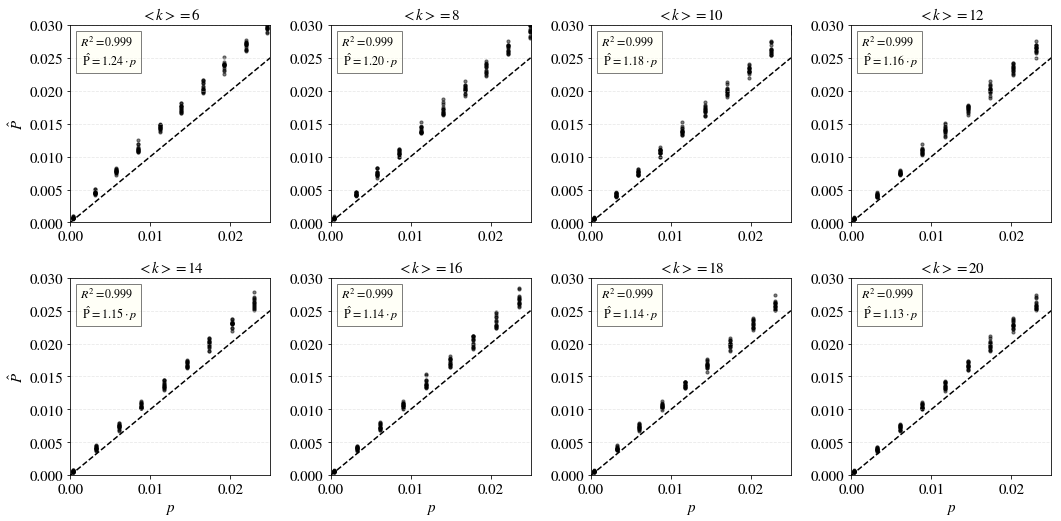

In [28]:
title = ['$<k>=6$','$<k>=8$','$<k>=10$','$<k>=12$','$<k>=14$','$<k>=16$','$<k>=18$','$<k>=20$']
fig = pl.figure(figsize=(15,7.5))
for j in range(8):
    ax = fig.add_subplot(2,4,j+1)
    X_data = d_cont2[j][:,  0]
    Y_data = d_cont2[j][:,  2]
    
    to_fit = pd.DataFrame({'X':X_data,'Y':Y_data})
    results = smf.ols('Y ~ X-1', data=to_fit).fit()
    a = results.params['X']
    r2 = results.rsquared
    
    ax.scatter(X_data,Y_data,s=10,marker='o',c = 'k',alpha=0.5)   
    textstr = '$R^2 = %.3f$ \n $\mathrm{\hat P} = %.2f\cdot p$'%(r2,a)
    props = dict(facecolor = 'ivory',alpha=0.5)
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=props)
    ax.yaxis.grid(True, linestyle='--', which='major', color='lightgrey',alpha=0.5)
    
    ax.plot([0,0.025],[0,0.025],'k--')
    ax.set_xlim([0,0.025])
    ax.set_ylim([0,0.03])
    ax.set_title(title[j],fontsize=15)
    
    if j >= 4:
        ax.set_xlabel('p',fontsize=15,style='italic')
    if j == 0 or j == 4:
        ax.set_ylabel('$\hat P$',fontsize=15,style='italic')
        
    '''
    if j < 4:
        ax.set_xticklabels([])
    if j in [1,2,3,5,6,7]:
        ax.set_yticklabels([])'''

pl.tight_layout()

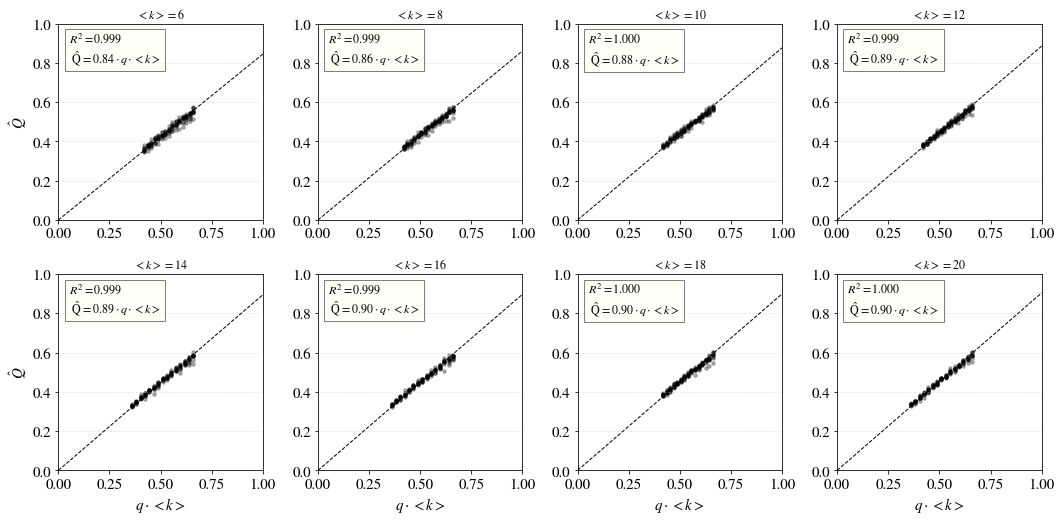

In [29]:
fig = pl.figure(figsize=(15,7.5))

for j in range(8):
    ax = fig.add_subplot(2, 4, j + 1)
    X_data = d_cont2[j][:, 1] *  (6 + 2 * j)
    Y_data = d_cont2[j][:, 3]
    to_fit = pd.DataFrame({'X':X_data , 'Y':Y_data})
    results = smf.ols('Y ~ X-1', data=to_fit).fit()
    a = results.params['X']
    r2 = results.rsquared
    
    textstr = '$R^2 = %.3f$ \n $\mathrm{\hat Q} = %.2f\cdot q\cdot<k>$'%(r2, a)
    props = dict(facecolor = 'ivory', alpha=0.5)
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=props)
    ax.yaxis.grid(True, linestyle='--', which='major', color='lightgrey',alpha=0.5)
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    ax.scatter(X_data,Y_data,c='k',marker='o',s=12,alpha=0.3)
    ax.plot([0, 1], [0, a], 'k--', lw = 1)
    ax.set_title(r'$<k>=%s$'%(2 * j + 6),fontsize = 12,style='italic')
    if j >= 4: 
        ax.set_xlabel('$q \cdot <k>$',fontsize=15)
    if j == 0 or j == 4:
        ax.set_ylabel('$\hatQ$',fontsize=15)
    '''
    if j < 4:
        ax.set_xticklabels([])
    if j in [1,2,3,5,6,7]:
        ax.set_yticklabels([])'''
    
pl.tight_layout()

### 3. Decision Rules

In [10]:
coeff_cont_gnm01 = np.load(u +"estimate_gnm_random_graph(10000,30000),0.1.npy")
coeff_cont_gnm03 = np.load(u +"estimate_gnm_random_graph(10000,30000),0.3.npy")
coeff_cont_gnm05 = np.load(u +"estimate_gnm_random_graph(10000,30000),0.5.npy")
coeff_cont_gnm07 = np.load(u +"estimate_gnm_random_graph(10000,30000),0.7.npy")
coeff_cont_gnm09 = np.load(u +"estimate_gnm_random_graph(10000,30000),0.9.npy")
coeff_cont_gnm10 = np.load(u +"estimate_gnm_random_graph(10000,30000),1.0.npy")

In [11]:
d_cont3 = [coeff_cont_gnm01,coeff_cont_gnm03,coeff_cont_gnm05,coeff_cont_gnm07,coeff_cont_gnm09,coeff_cont_gnm10]

(1) Estimated potential market

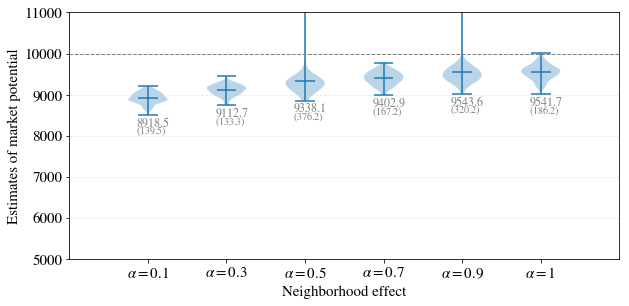

In [12]:
fig = pl.figure(figsize = (9,4.5))

ax = fig.add_subplot(1,1,1)
ax.axhline(10000,color='gray',ls = '--', lw = 1)
ax.set_xlim([0,7])
ax.set_ylim([5000,11000])
ax.set_xlabel('Neighborhood effect')
ax.set_ylabel('Estimates of market potential',fontsize = 15)
ax.set_xticks([1, 2, 3, 4, 5, 6])
ax.set_xticklabels([r'$\alpha=0.1$',r'$\alpha=0.3$',r'$\alpha=0.5$',r'$\alpha=0.7$',r'$\alpha=0.9$',r'$\alpha=1$'], fontsize=15)
data = [v[:, 4] for v in d_cont3]
    
#ax.boxplot(data,notch=1,vert =1,whis=0,widths = 0.3,positions = np.arange(1,7))
ax.violinplot(data,showmedians=False,showmeans=True,showextrema=True,widths = 0.5,positions=np.arange(1,7))
ax.yaxis.grid(True, linestyle='--', which='major', color='lightgrey',alpha=0.5)
for i in np.arange(1,7):
    ax.text(i-0.15,np.min(data[i-1])-200,r'$%.1f$'%np.mean(data[i-1]),
             fontsize=12, verticalalignment='center',color='k',alpha=0.5)
    ax.text(i-0.15,np.min(data[i-1])-400,r'$(%.1f)$'%np.std(data[i-1]),
             fontsize=10, verticalalignment='center',color='k',alpha=0.5)
pl.setp(ax,xticks=[1,2,3,4,5,6],xticklabels=[r'$\alpha=0.1$',r'$\alpha=0.3$',r'$\alpha=0.5$',r'$\alpha=0.7$',r'$\alpha=0.9$',r'$\alpha=1$'])
pl.tight_layout()

(2) P and p

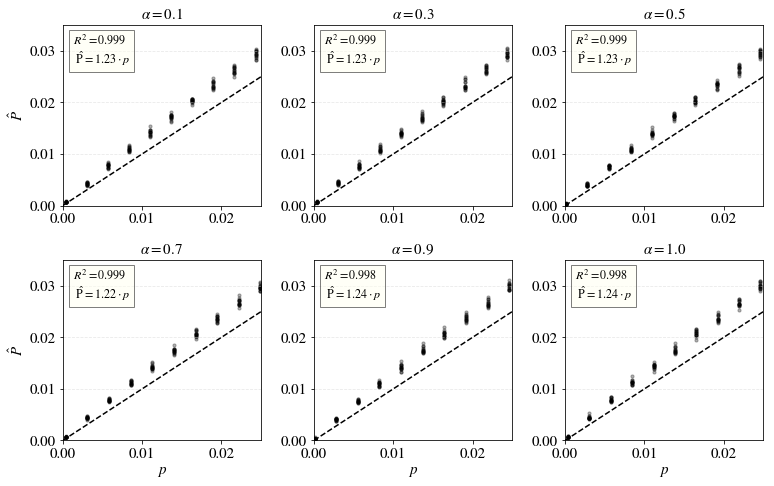

In [14]:
fig = pl.figure(figsize = (11,7))
title = [0.1,0.3,0.5,0.7,0.9,1.0]
draw_cont = zip(d_cont3,title)

i = 1
for x in draw_cont:
    ax = fig.add_subplot(2,3,i)
    X_data = x[0][:, 0]
    Y_data = x[0][:, 2]
    #for l in range(5):
    # ax.scatter(X_data[:(l+1)*20],Y_data[:(l+1)*20],c='k',s=10,marker='o',alpha=0.5)
    
    to_fit = pd.DataFrame({'X':X_data,'Y':Y_data})
    results = smf.ols('Y ~ X-1', data=to_fit).fit()
    a = results.params['X']
    r2 = results.rsquared
    
    ax.scatter(X_data,Y_data,s=10,marker='o',c='k',alpha=0.3)   
    textstr = '$R^2 = %.3f$ \n $\mathrm{\hat P} = %.2f\cdot p$'%(r2,a)
    props = dict(facecolor = 'ivory',alpha=0.5)
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=props)
    ax.yaxis.grid(True, linestyle='--', which='major', color='lightgrey',alpha=0.5)
    
    ax.plot(np.arange(0,0.032,0.001),np.arange(0,0.032,0.001),'k--')
    ax.set_title(r'$\alpha = %s$'%x[1],fontsize=15,style='italic')
    ax.set_xlim([0,0.025])
    ax.set_ylim([0,0.035])
    if i == 1 or i == 4:    
        ax.set_ylabel(r'$\hat P$',fontsize=15)
        
    if i >= 4:
        ax.set_xlabel(r'$p$',fontsize=15)

    '''if i in [2,3,5,6]:
        ax.set_yticklabels([])
    if i < 4:
        ax.set_xticklabels([])'''
        
    i = i+1

pl.tight_layout()

(3) Q and q

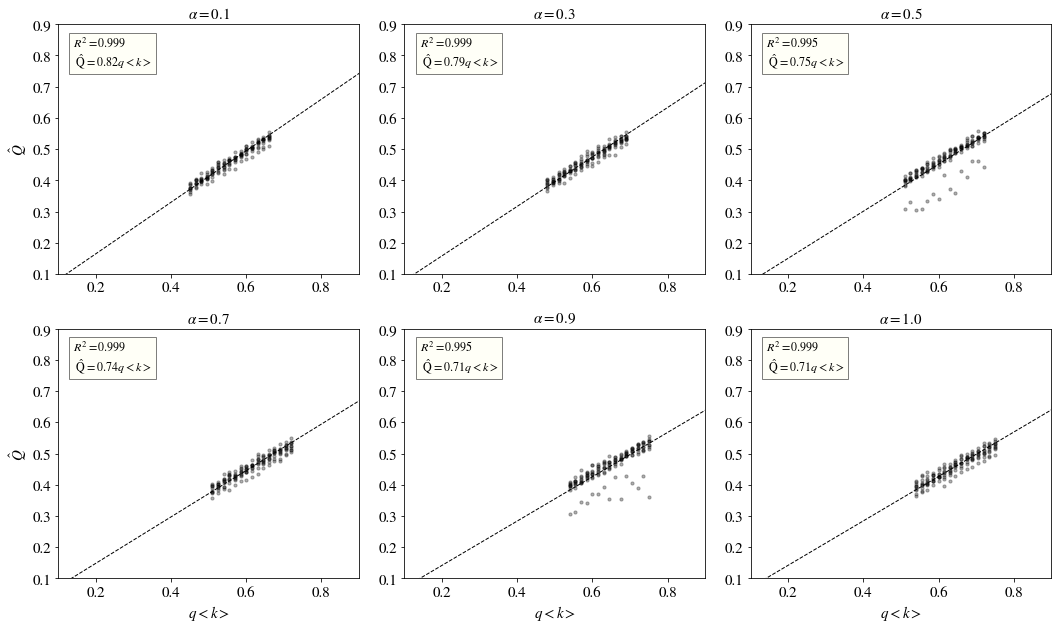

In [15]:
fig = pl.figure(figsize=(15,9))
alpha_cont = [0.1,0.3,0.5,0.7,0.9,1.0]
for i in range(6):
    ax = fig.add_subplot(2, 3, i + 1)
    X_data = d_cont3[i][:, 1] * 6 ** (1-alpha_cont[i])
    Y_data = d_cont3[i][:, 3]
    to_fit = pd.DataFrame({'X':X_data, 'Y':Y_data})
    results = smf.ols('Y ~ X-1', data=to_fit).fit()
    a = results.params['X']
    r2 = results.rsquared

    textstr = '$R^2 = %.3f$ \n $\mathrm{\hat Q} = %.2f q<k>$'%(r2,a)
    props = dict(facecolor = 'ivory',alpha=0.5)
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)
    
    ax.set_xlim([0.1,0.9])
    ax.set_ylim([0.1,0.9])
    ax.scatter(X_data,Y_data,c='k',marker='o',s=10,alpha=0.3)
    ax.plot([0,1],[0,1*a],'k--',lw = 1)
    ax.set_title(r'$\alpha=%s$'%alpha_cont[i],fontsize = 15)
    
    if i >= 3:
        ax.set_xlabel(r'$q<k>$',fontsize=15)
    
    if i == 0 or i == 3:
        ax.set_ylabel('$\hat Q$',fontsize=15)

pl.tight_layout() 

### 4. Individual-level heterogeneity

In [17]:
coeff_cont_sgima01 = np.load(u +"estimate_sigma-0.1.npy")
coeff_cont_sgima02 = np.load(u +"estimate_sigma-0.2.npy")
coeff_cont_sgima04 = np.load(u +"estimate_sigma-0.4.npy")
coeff_cont_sgima06 = np.load(u +"estimate_sigma-0.6.npy")
coeff_cont_sgima08 = np.load(u +"estimate_sigma-0.8.npy")
coeff_cont_sgima10 = np.load(u +"estimate_sigma-1.0.npy")

In [23]:
d_cont4 = [coeff_cont_sgima01,coeff_cont_sgima02,coeff_cont_sgima04,
           coeff_cont_sgima06,coeff_cont_sgima08,coeff_cont_sgima10]

#### (1) potential market

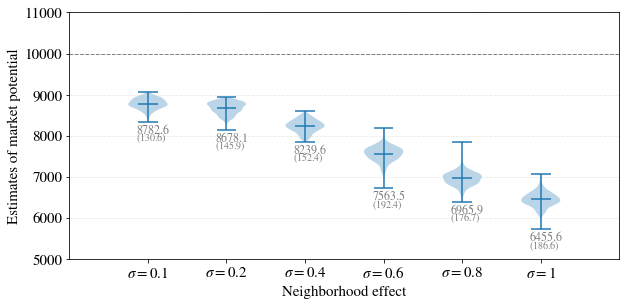

In [24]:
fig = pl.figure(figsize = (9,4.5))

ax = fig.add_subplot(1,1,1)
ax.axhline(10000,color='gray',ls = '--', lw = 1)
ax.set_xlim([0,7])
ax.set_ylim([5000,11000])
ax.set_xlabel('Neighborhood effect')
ax.set_ylabel('Estimates of market potential',fontsize = 15)
ax.set_xticks([1, 2, 3, 4, 5, 6])
ax.set_xticklabels([r'$\sigma=0.1$',r'$\sigma=0.2$',r'$\sigma=0.4$',r'$\sigma=0.6$',r'$\sigma=0.8$',r'$\sigma=1$'], fontsize=15)
data = [v[:, 4] for v in d_cont4]
    
#ax.boxplot(data,notch=1,vert =1,whis=0,widths = 0.3,positions = np.arange(1,7))
ax.violinplot(data,showmedians=False,showmeans=True,showextrema=True,widths = 0.5,positions=np.arange(1,7))
ax.yaxis.grid(True, linestyle='--', which='major', color='lightgrey',alpha=0.5)
for i in np.arange(1,7):
    ax.text(i-0.15,np.min(data[i-1])-200,r'$%.1f$'%np.mean(data[i-1]),
             fontsize=12, verticalalignment='center',color='k',alpha=0.5)
    ax.text(i-0.15,np.min(data[i-1])-400,r'$(%.1f)$'%np.std(data[i-1]),
             fontsize=10, verticalalignment='center',color='k',alpha=0.5)
pl.setp(ax,xticks=[1,2,3,4,5,6],xticklabels=[r'$\sigma=0.1$',r'$\sigma=0.2$',r'$\sigma=0.4$',r'$\sigma=0.6$',r'$\sigma=0.8$',r'$\sigma=1$'])
pl.tight_layout()

#### (2) P and p

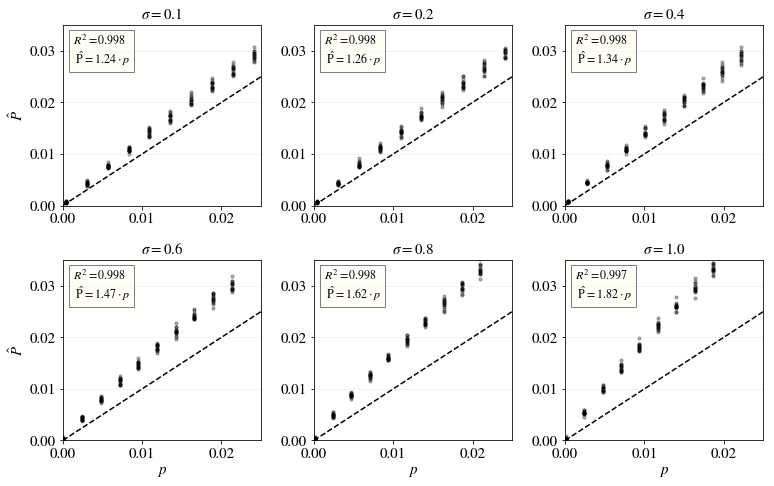

In [25]:
fig = pl.figure(figsize = (11,7))
title = [0.1,0.2,0.4,0.6,0.8,1.0]
draw_cont = zip(d_cont4,title)

i = 1
for x in draw_cont:
    ax = fig.add_subplot(2,3,i)
    X_data = x[0][:, 0]
    Y_data = x[0][:, 2]
    #for l in range(5):
    # ax.scatter(X_data[:(l+1)*20],Y_data[:(l+1)*20],c='k',s=10,marker='o',alpha=0.5)
    
    to_fit = pd.DataFrame({'X':X_data,'Y':Y_data})
    results = smf.ols('Y ~ X-1', data=to_fit).fit()
    a = results.params['X']
    r2 = results.rsquared
    
    ax.scatter(X_data,Y_data,s=10,marker='o',c='k',alpha=0.3)   
    textstr = '$R^2 = %.3f$ \n $\mathrm{\hat P} = %.2f\cdot p$'%(r2,a)
    props = dict(facecolor = 'ivory',alpha=0.5)
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=props)
    ax.yaxis.grid(True, linestyle='--', which='major', color='lightgrey',alpha=0.5)
    
    ax.plot(np.arange(0,0.032,0.001),np.arange(0,0.032,0.001),'k--')
    ax.set_title(r'$\sigma = %s$'%x[1],fontsize=15,style='italic')
    ax.set_xlim([0,0.025])
    ax.set_ylim([0,0.035])
    if i == 1 or i == 4:    
        ax.set_ylabel(r'$\hat P$',fontsize=15)
        
    if i >= 4:
        ax.set_xlabel(r'$p$',fontsize=15)

    '''if i in [2,3,5,6]:
        ax.set_yticklabels([])
    if i < 4:
        ax.set_xticklabels([])'''
        
    i = i+1

pl.tight_layout()

#### (3) Q and q

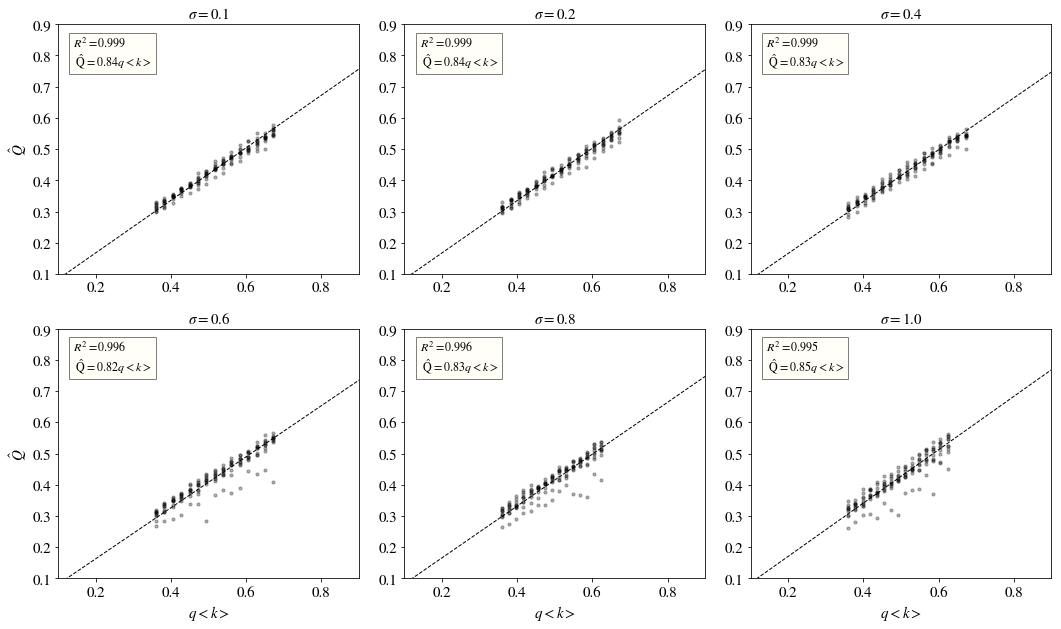

In [27]:
fig = pl.figure(figsize=(15,9))
alpha_cont = [0.1,0.2,0.4,0.6,0.8,1.0]
for i in range(6):
    ax = fig.add_subplot(2, 3, i + 1)
    X_data = d_cont4[i][:, 1] * 6
    Y_data = d_cont4[i][:, 3]
    to_fit = pd.DataFrame({'X':X_data, 'Y':Y_data})
    results = smf.ols('Y ~ X-1', data=to_fit).fit()
    a = results.params['X']
    r2 = results.rsquared

    textstr = '$R^2 = %.3f$ \n $\mathrm{\hat Q} = %.2f q<k>$'%(r2,a)
    props = dict(facecolor = 'ivory',alpha=0.5)
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)
    
    ax.set_xlim([0.1,0.9])
    ax.set_ylim([0.1,0.9])
    ax.scatter(X_data,Y_data,c='k',marker='o',s=10,alpha=0.3)
    ax.plot([0,1],[0,1*a],'k--',lw = 1)
    ax.set_title(r'$\sigma=%s$'%alpha_cont[i],fontsize = 15)
    
    if i >= 3:
        ax.set_xlabel(r'$q<k>$',fontsize=15)
    
    if i == 0 or i == 3:
        ax.set_ylabel('$\hat Q$',fontsize=15)

pl.tight_layout() 